In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.stats as stats
import pylab 

In [2]:
# Type your Loan.csv path
file_path = 'Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    'RiskScore'
]

In [4]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists
if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalLiabilities MonthlyIncome  JobTenure  NetWorth  BaseInterestRate  \
0             19183   3329.000000       

In [5]:
print(df[df.isna().any(axis=1)]) # Show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved, RiskScore]
Index: []

[0 rows x 35 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           

In [6]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['LoanApproved'] == 0]
minority_class = df[df['LoanApproved'] == 1]

# Undersample the majority class
majority_class_undersampled = resample(majority_class, 
                                       replace=False,
                                       n_samples=len(minority_class),
                                       random_state=42)

# Recombine the undersampled majority class with the minority class
df = pd.concat([majority_class_undersampled, minority_class])

# Check the distribution of the classes
print(df['LoanApproved'].value_counts())

LoanApproved
0    4780
1    4780
Name: count, dtype: int64


In [7]:
# Splitting the dataset
attr = df.drop(columns = ['LoanApproved', 'RiskScore'])           # Features (Removed RiskScore as well since it is directly correlated)
target = df['LoanApproved']                                       # Target Variable

attr.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
10707,2047-04-26,29,26030,585,Employed,Bachelor,8,20642,24,Married,...,2409,101046,168722,2169.166667,3,4009,0.203142,0.188165,1038.695486,0.657255
9363,2043-08-21,41,21625,483,Employed,Associate,18,63536,36,Married,...,575,19656,26241,1802.083333,4,4061,0.307036,0.319326,2764.896774,1.676891
15312,2059-12-04,57,78939,569,Employed,High School,34,31746,48,Single,...,244,48788,16837,6578.250000,6,31951,0.242246,0.218378,997.399107,0.203458
5055,2031-11-04,26,33649,546,Employed,Associate,4,22496,108,Married,...,2045,64286,10851,2804.083333,6,53435,0.294496,0.308268,617.816947,0.461048
18237,2067-12-07,61,42842,570,Employed,Bachelor,38,22227,72,Widowed,...,898,43231,2848,3570.166667,6,40383,0.252227,0.201782,534.697365,0.233238


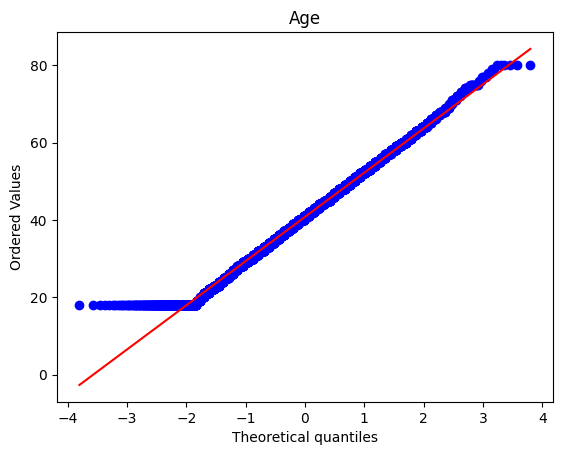

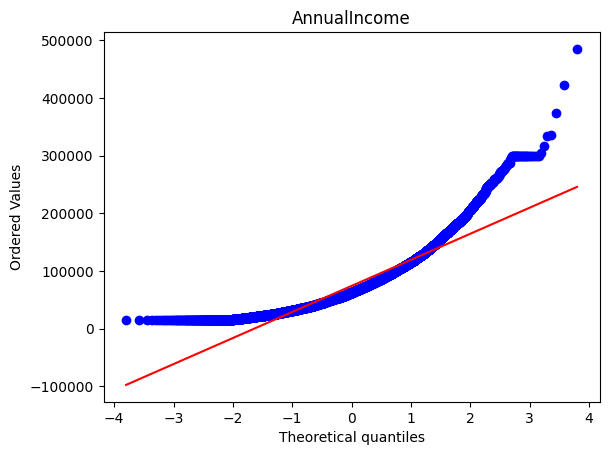

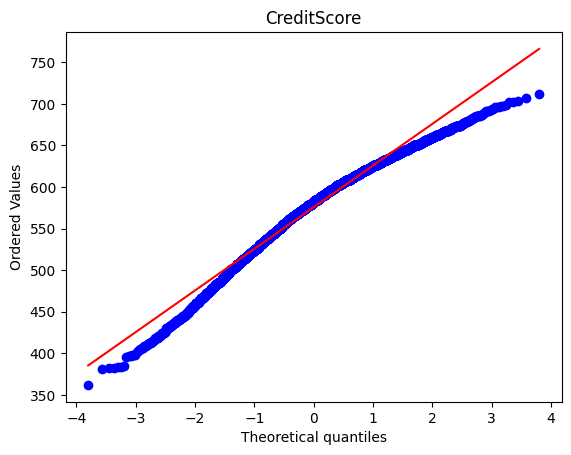

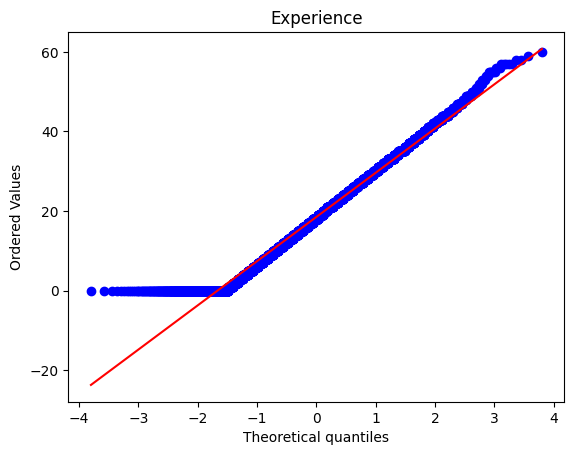

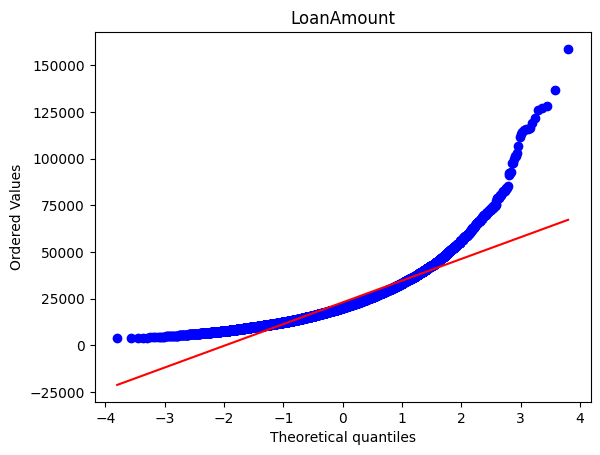

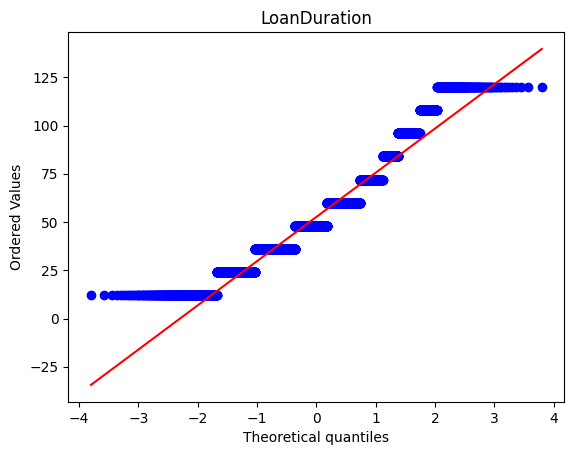

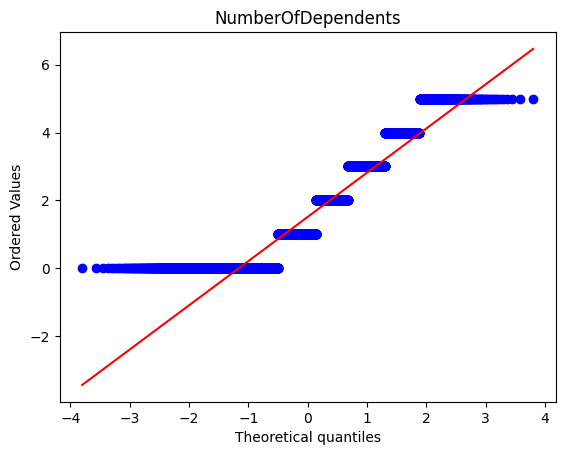

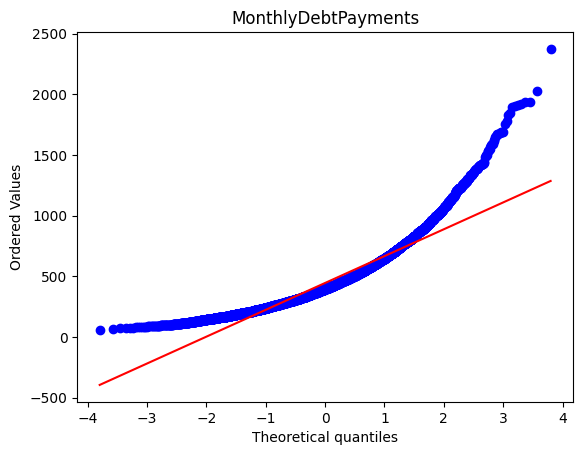

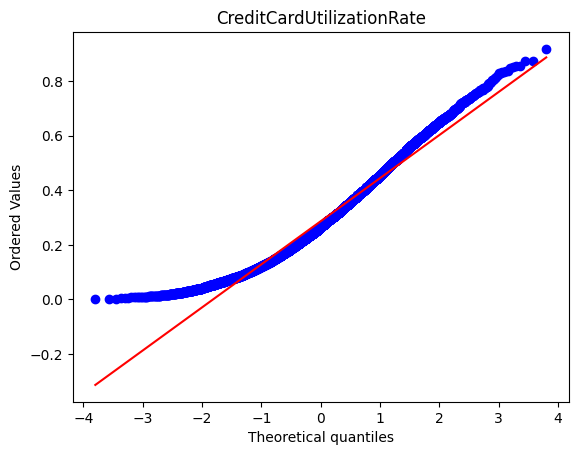

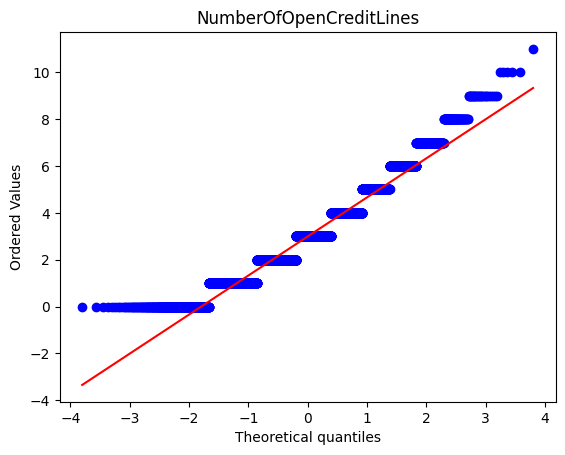

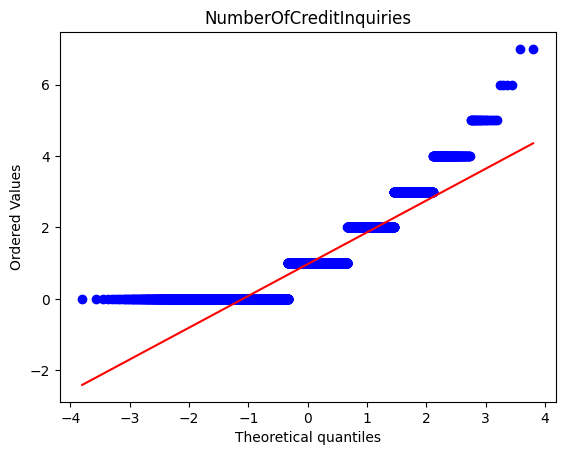

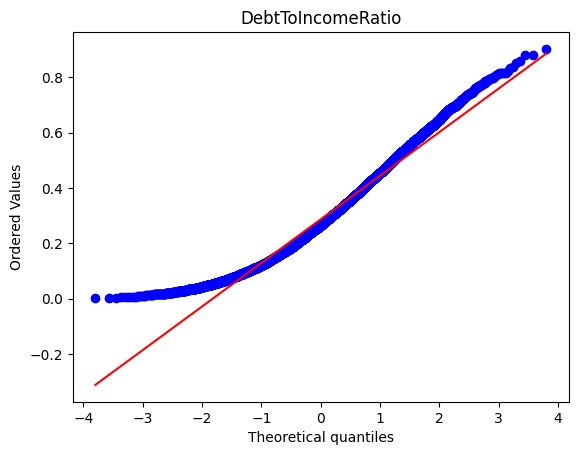

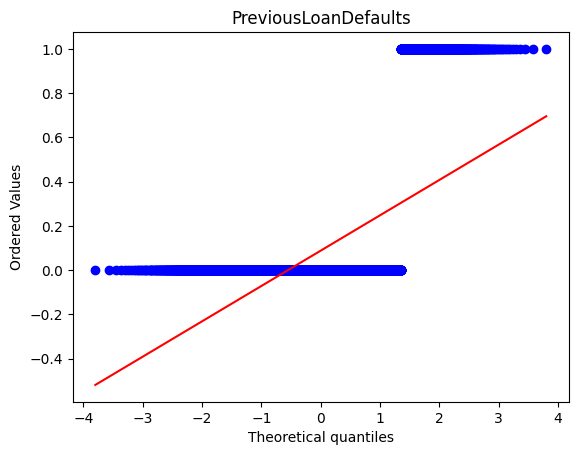

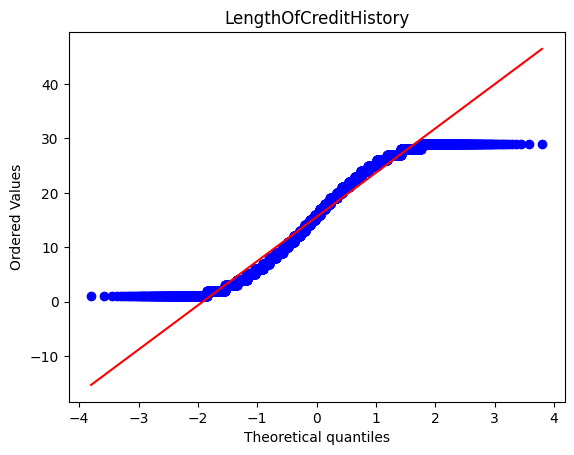

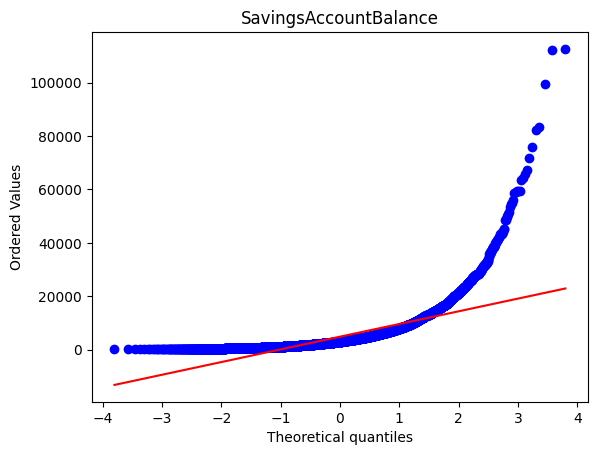

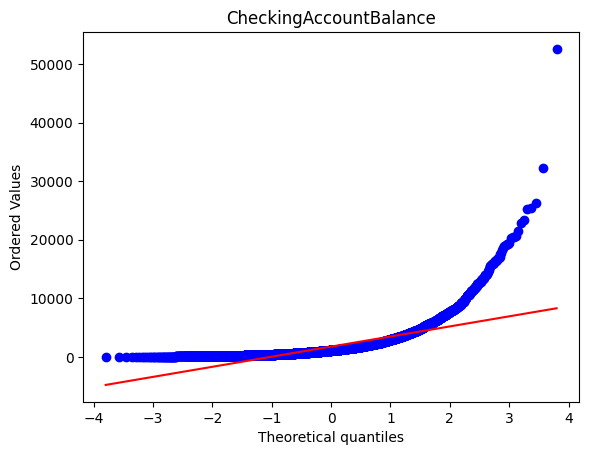

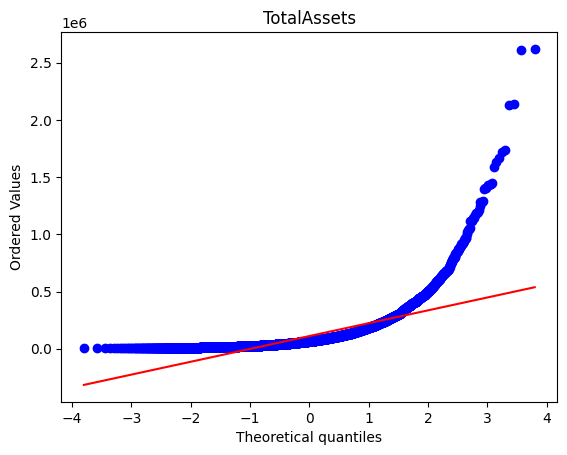

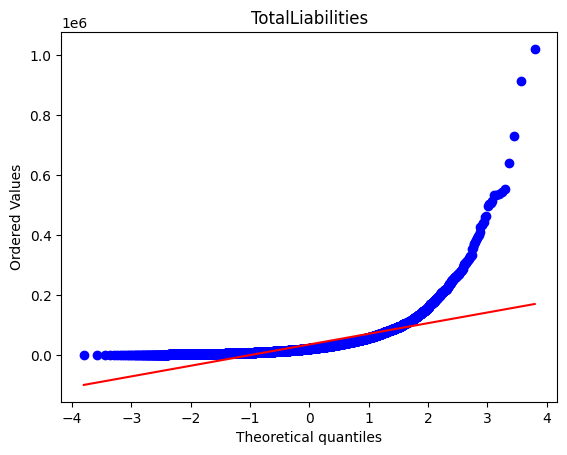

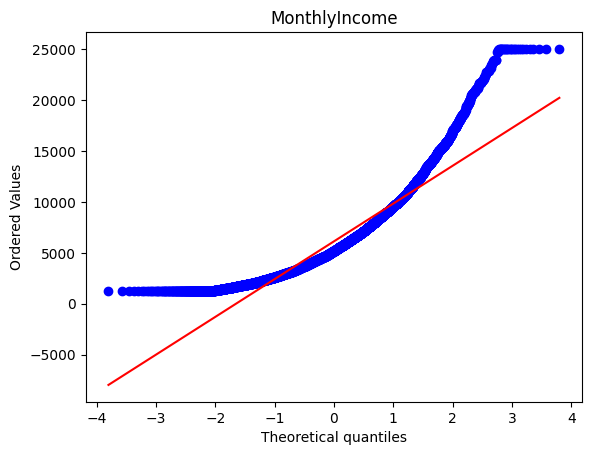

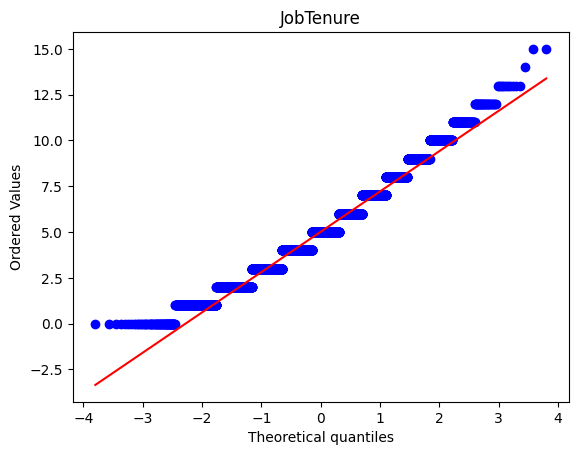

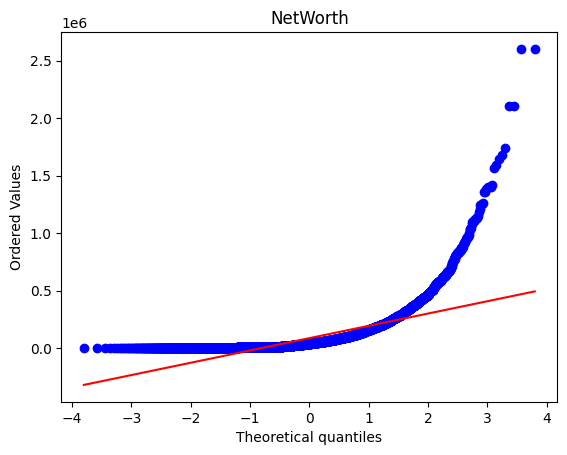

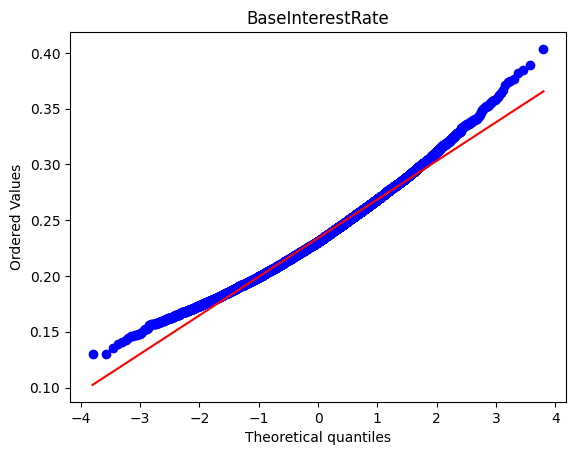

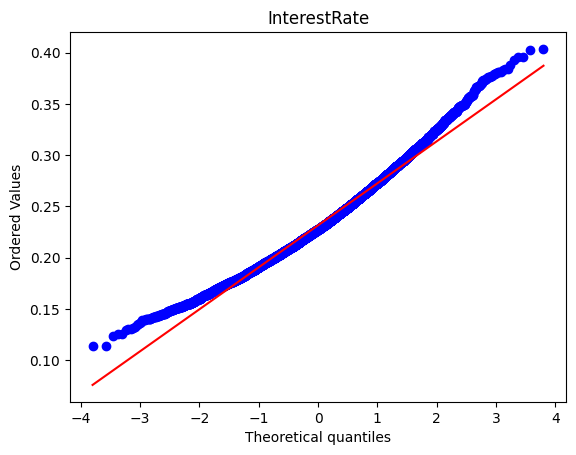

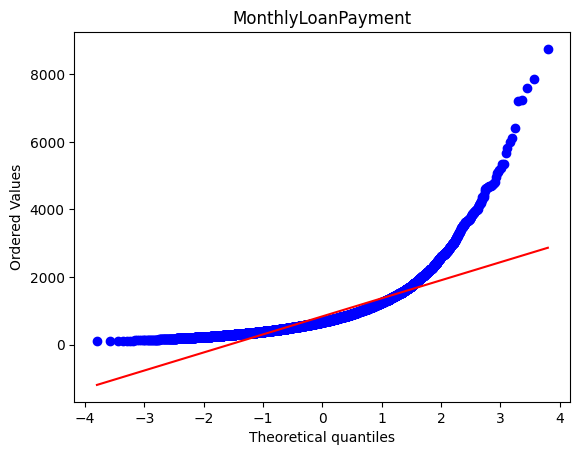

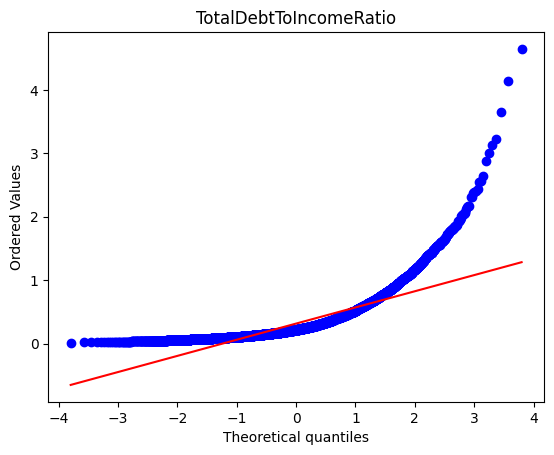

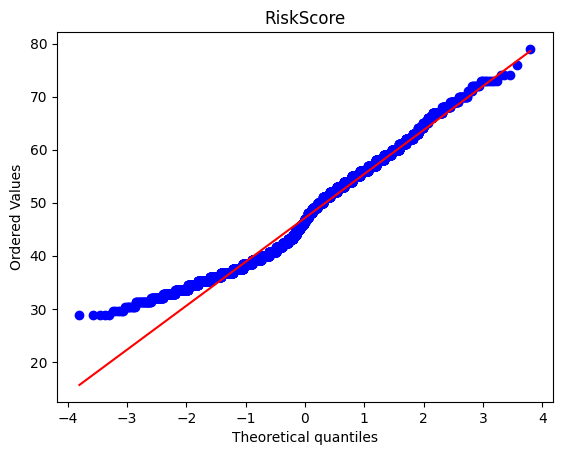

In [8]:
# Generate a probability plot for each numeric header
for header in list(numeric_columns):
    plt = stats.probplot(df[header], dist="norm", plot=pylab)
    pylab.title(header) 
    pylab.show()

### Correlation

In [9]:
df = df.drop(columns=['ApplicationDate'])

df_encoded = pd.get_dummies(df, drop_first=True) # One-hot encoding categorical variables

# Point-Biserial Correlation for continuous features with binary target (LoanApproved)
point_biserial_correlations = {}

for column in numeric_columns:
    correlation, p_value = pointbiserialr(df_encoded[column], df_encoded['LoanApproved_1'])
    point_biserial_correlations[column] = correlation

# Chi-Square Test of Independence for categorical features with binary target (without LoanApproved)
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory'
]
chi_square_p_values = {}

encoded_columns = [col for col in df_encoded.columns if col not in categorical_columns]

for column in encoded_columns:
    contingency_table = pd.crosstab(df_encoded[column], df_encoded['LoanApproved_1'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_square_p_values[column] = p_value

In [10]:
# Convert the point-biserial correlation dictionary to a DataFrame
point_biserial_correlations_df = pd.DataFrame(list(point_biserial_correlations.items()), columns=['Feature', 'Correlation'])

# Print the resulting DataFrame
print("\nPoint-Biserial Correlation for continuous features:")
point_biserial_correlations_df


Point-Biserial Correlation for continuous features:


,Feature,Correlation
0,Age,0.167331
1,AnnualIncome,0.581686
2,CreditScore,0.173091
3,Experience,0.165917
4,LoanAmount,-0.303687
5,LoanDuration,-0.116180
6,NumberOfDependents,0.007752
7,MonthlyDebtPayments,-0.092699
8,CreditCardUtilizationRate,-0.020635
9,NumberOfOpenCreditLines,0.009351


In [11]:
# Convert the chi-square p-values dictionary to a DataFrame
chi_square_p_values_df = pd.DataFrame(list(chi_square_p_values.items()), columns=['Feature', 'P-Value'])

# Print the resulting DataFrame
print("\nChi-Square p-values:")
chi_square_p_values_df


Chi-Square p-values:


,Feature,P-Value
0,Age,1.509057e-42
1,AnnualIncome,1.176826e-02
2,CreditScore,1.150208e-18
3,Experience,1.612117e-42
4,LoanAmount,2.077344e-01
...,...,...
76,PaymentHistory_42,1.000000e+00
77,PaymentHistory_43,1.000000e+00
78,PaymentHistory_44,1.000000e+00
79,PaymentHistory_45,1.000000e+00


In [12]:
# Set significance level (alpha) for correlation
alpha = 0.05

# Filter features where the p-value is less than alpha (significantly correlated)
significant_features = chi_square_p_values_df[chi_square_p_values_df['P-Value'] < alpha]

# Print the significant features
print("\nSignificant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                           Feature       P-Value
0                              Age  1.509057e-42
1                     AnnualIncome  1.176826e-02
2                      CreditScore  1.150208e-18
3                       Experience  1.612117e-42
5                     LoanDuration  1.003712e-30
12            PreviousLoanDefaults  2.716102e-15
13           LengthOfCreditHistory  4.359962e-19
18                   MonthlyIncome  1.088174e-02
25                       RiskScore  0.000000e+00
26  EmploymentStatus_Self-Employed  1.817777e-03
27     EmploymentStatus_Unemployed  5.645314e-04
28         EducationLevel_Bachelor  1.572928e-06
29        EducationLevel_Doctorate  2.468004e-24
30      EducationLevel_High School  2.238769e-67
31           EducationLevel_Master  1.335883e-32
35       HomeOwnershipStatus_Other  1.446481e-02
37        HomeOwnershipStatus_Rent  4.406699e-03
38             BankruptcyHistory_1  1.144554e-22
42               LoanPurpose_

In [13]:
# Remove RiskScore since it is directly correlated and target
strings_to_drop = ['RiskScore', 'LoanApproved_1']
significant_features = significant_features[~significant_features['Feature'].isin(strings_to_drop)]

LoanApproved
0    4780
1    4780
Name: count, dtype: int64

LoanApproved
0    50.0
1    50.0
Name: count, dtype: float64


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
10707,29,26030,585,Employed,Bachelor,8,20642,24,Married,2,...,168722,2169.166667,3,4009,0.203142,0.188165,1038.695486,0.657255,0,61.0
9363,41,21625,483,Employed,Associate,18,63536,36,Married,1,...,26241,1802.083333,4,4061,0.307036,0.319326,2764.896774,1.676891,0,52.0
15312,57,78939,569,Employed,High School,34,31746,48,Single,2,...,16837,6578.250000,6,31951,0.242246,0.218378,997.399107,0.203458,0,51.0
5055,26,33649,546,Employed,Associate,4,22496,108,Married,1,...,10851,2804.083333,6,53435,0.294496,0.308268,617.816947,0.461048,0,48.0
18237,61,42842,570,Employed,Bachelor,38,22227,72,Widowed,3,...,2848,3570.166667,6,40383,0.252227,0.201782,534.697365,0.233238,0,56.0


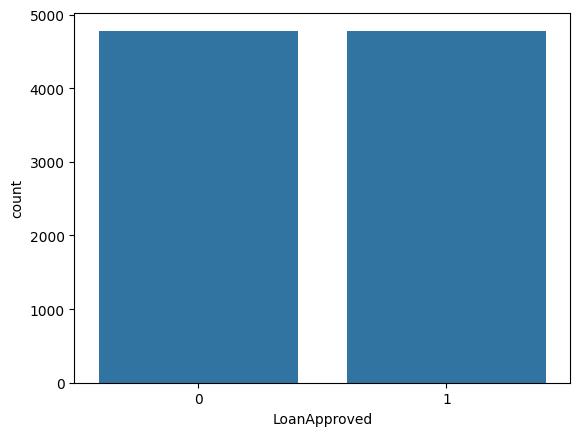

In [14]:
print(df['LoanApproved'].value_counts())
print()
print((df['LoanApproved'].value_counts() / df['LoanApproved'].value_counts().sum()) * 100)

sns.countplot(data=df, x='LoanApproved')
df.head()

### HClust

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

scaler = MinMaxScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)

groups = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')

clusters = groups.fit_predict(attr)

df_cluster = pd.DataFrame({'Actual':target,'Cluster':clusters})

# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

print(f"\nAccuracy: {accuracy_score(target, clusters)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target, clusters))
print(f"\n Classification Report:")
print(classification_report(target, clusters))

Cluster     0  1
Actual          
False    4780  0
True     4779  1

Accuracy: 0.5001046025104603

 Confusion Matrix:
[[4780    0]
 [4779    1]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67      4780
        True       1.00      0.00      0.00      4780

    accuracy                           0.50      9560
   macro avg       0.75      0.50      0.33      9560
weighted avg       0.75      0.50      0.33      9560



In [16]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

scaler = MinMaxScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)

groups = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')

clusters = groups.fit_predict(attr)

df_cluster = pd.DataFrame({'Actual':target,'Cluster':clusters})

# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

print(f"\nAccuracy: {accuracy_score(target, clusters)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target, clusters))
print(f"\n Classification Report:")
print(classification_report(target, clusters))

Cluster     0  1
Actual          
False    4780  0
True     4779  1

Accuracy: 0.5001046025104603

 Confusion Matrix:
[[4780    0]
 [4779    1]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67      4780
        True       1.00      0.00      0.00      4780

    accuracy                           0.50      9560
   macro avg       0.75      0.50      0.33      9560
weighted avg       0.75      0.50      0.33      9560



In [17]:
# Select only numeric columns
numeric_columns_df = df.select_dtypes(include=['number'])

# Splitting the dataset
attr = numeric_columns_df.drop(columns = ['RiskScore'])     # Features (without RiskScore)
target = df['LoanApproved']                                 # Target Variable

scaler = MinMaxScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)

groups = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')

clusters = groups.fit_predict(attr)

df_cluster = pd.DataFrame({'Actual':target,'Cluster':clusters})

# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

print(f"\nAccuracy: {accuracy_score(target, clusters)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target, clusters))
print(f"\n Classification Report:")
print(classification_report(target, clusters))

Cluster     0  1
Actual          
0        4780  0
1        4779  1

Accuracy: 0.5001046025104603

 Confusion Matrix:
[[4780    0]
 [4779    1]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4780
           1       1.00      0.00      0.00      4780

    accuracy                           0.50      9560
   macro avg       0.75      0.50      0.33      9560
weighted avg       0.75      0.50      0.33      9560



### Kmeans

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

scaler = MinMaxScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)

kmeans = KMeans(n_clusters=2, random_state=100)

kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

df_cluster = pd.DataFrame({'Actual':target,'Cluster':labels})

# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

print(f"\nAccuracy: {accuracy_score(target, labels)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target, labels))
print(f"\n Classification Report:")
print(classification_report(target, labels))

Cluster     0     1
Actual             
False    3386  1394
True     3167  1613

Accuracy: 0.522907949790795

 Confusion Matrix:
[[3386 1394]
 [3167 1613]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.52      0.71      0.60      4780
        True       0.54      0.34      0.41      4780

    accuracy                           0.52      9560
   macro avg       0.53      0.52      0.51      9560
weighted avg       0.53      0.52      0.51      9560



In [19]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

scaler = MinMaxScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)

kmeans = KMeans(n_clusters=2, random_state=100)

kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

df_cluster = pd.DataFrame({'Actual':target,'Cluster':labels})

# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

print(f"\nAccuracy: {accuracy_score(target, labels)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target, labels))
print(f"\n Classification Report:")
print(classification_report(target, labels))

Cluster     0     1
Actual             
False    2338  2442
True     2249  2531

Accuracy: 0.5093096234309623

 Confusion Matrix:
[[2338 2442]
 [2249 2531]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.49      0.50      4780
        True       0.51      0.53      0.52      4780

    accuracy                           0.51      9560
   macro avg       0.51      0.51      0.51      9560
weighted avg       0.51      0.51      0.51      9560



In [20]:
# Select only numeric columns
numeric_columns_df = df.select_dtypes(include=['number'])

# Splitting the dataset
attr = numeric_columns_df.drop(columns = ['RiskScore'])     # Features (without RiskScore)
target = df['LoanApproved']                                 # Target Variable

scaler = MinMaxScaler()

# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)

kmeans = KMeans(n_clusters=2, random_state=100)

kmeans.fit(attr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

df_cluster = pd.DataFrame({'Actual':target,'Cluster':labels})

# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

print(f"\nAccuracy: {accuracy_score(target, labels)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target, labels))
print(f"\n Classification Report:")
print(classification_report(target, labels))

Cluster     0     1
Actual             
0        2115  2665
1        2118  2662

Accuracy: 0.49968619246861923

 Confusion Matrix:
[[2115 2665]
 [2118 2662]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47      4780
           1       0.50      0.56      0.53      4780

    accuracy                           0.50      9560
   macro avg       0.50      0.50      0.50      9560
weighted avg       0.50      0.50      0.50      9560

